In [1]:
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas
import statsmodels.api   as sm    # Biblioteca para realizar algunos modelos estadisticos

from sklearn        import linear_model  # Función para realizar un modelo de regresiòn lineal
from scipy.optimize import minimize      # Función para encontrar minimos locales de una funciòn
from scipy.optimize import basinhopping  # Función para encontrar minimos 'globales' de una funciòn

In [2]:
# Cargamos nuestros datos, los visualizamos y creamos 2 arrays para trabajar màs comodamente
datos_ajuste = pd.read_csv("datos_ajuste_3.csv")
print( datos_ajuste.head() )

x = np.array( datos_ajuste["X"] )
y = np.array( datos_ajuste["Y"] )

   X         Y
0  1  4.476152
1  2  3.798786
2  3  5.976566
3  4  4.474427
4  5  5.477573


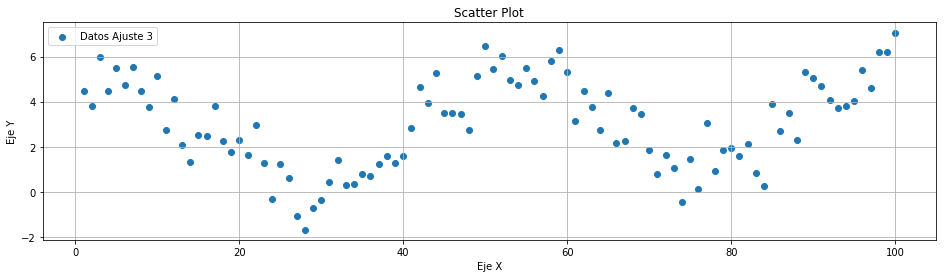

In [3]:
# Realizamos un grafico de dispersión ( Scatter-Plot )
plt.figure( figsize=(16,4) )                           # Indicamos el tamaño de la gráfica
plt.title("Scatter Plot")                              # Añadimos el titulo
plt.scatter( x, y , label = "Datos Ajuste 3")          # Añadimos la 'capa' de puntos 
plt.xlabel("Eje X")                                    # Modificamos la etiqueta del eje X
plt.ylabel("Eje Y")                                    # Modificamos la etiqueta del eje Y
plt.grid()                                             # Añadimos una cuadricula/rendija 
plt.legend()                                           # Añadimos un cuadro con la leyenda
plt.show()                                             # Indicamos que queremos mostrar la gráfica

Supongamos que queremos ajustar el siguiente modelo

$$y = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot sin\left( \frac{ 2 \pi x}{48} \right) + \beta_3 \cdot cos\left( \frac{2 \pi x }{ 48} \right) + \varepsilon$$

In [4]:
# Creamos nuestra matriz de diseño
matriz_diseño = np.array( [ np.ones( len(x) ), x, np.sin(2*np.pi*x/48) , np.cos(2*np.pi*x/48) ] ).transpose()

print( "Matriz de diseño: " )
print( matriz_diseño[0:5,:] )
print( "..." )

Matriz de diseño: 
[[1.         1.         0.13052619 0.99144486]
 [1.         2.         0.25881905 0.96592583]
 [1.         3.         0.38268343 0.92387953]
 [1.         4.         0.5        0.8660254 ]
 [1.         5.         0.60876143 0.79335334]]
...


In [5]:
# Mostramos los coeficientes que nos darian las funciones ya contenidas en bibliotecas
print( "Coeficientes StatsModels:  ", sm.OLS(y, matriz_diseño ).fit().params )

modelo = linear_model.LinearRegression(fit_intercept=True).fit( matriz_diseño  , y )
print( "Coeficientes Scikit-Learn: " , np.array( [ modelo.intercept_, modelo.coef_[1], modelo.coef_[2], modelo.coef_[3]  ] ) )

Coeficientes StatsModels:   [2.07635403 0.01714962 1.53218394 1.84584556]
Coeficientes Scikit-Learn:  [2.07635403 0.01714962 1.53218394 1.84584556]


In [6]:
# Función de costo para una regresión lineal ordinaria por minimos cuadrados
def fun_costo_OLS( betas ):
    return np.mean( np.power( y - ( betas[0] + betas[1] * x + betas[2] * np.sin(2*np.pi*x/48) + betas[3] * np.cos(2*np.pi*x/48) ) , 2 ) )

In [7]:
# Para optimizar nuestra función de costo, debemos usar nuestra función 'minimize', indicarle nuestra función
# de costro previamente creada y un arreglo inicial para iterar sobre él
betas_iniciales     = np.array( [ 0, 0, 0, 0 ] )
objeto_optimizacion = minimize( fun_costo_OLS, betas_iniciales )
print( objeto_optimizacion )

# Antes de utilizar el resultado, debemos verificar que converge el método
# Como es un modelo lineal, siempre encontrará un minimo/maximo global
# Si el modelo NO es lineal, entonces, encontrará una solución local

      fun: 0.871553968116513
 hess_inv: array([[ 2.25065848e+00, -3.46307530e-02, -4.93087187e-01,
         1.25854382e-01],
       [-3.46307530e-02,  6.85737875e-04,  9.54293202e-03,
        -3.23104850e-03],
       [-4.93087187e-01,  9.54293202e-03,  1.16890045e+00,
        -7.17401865e-02],
       [ 1.25854382e-01, -3.23104850e-03, -7.17401865e-02,
         9.93426347e-01]])
      jac: array([-7.45058060e-09,  2.23517418e-08,  0.00000000e+00,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([2.07635572, 0.01714959, 1.53218346, 1.84584572])


In [8]:
# Guardamos el resultado del proceso de optimizacion a un array para ser utilizado
betas_OLS   = minimize( fun_costo_OLS,   betas_iniciales ).x
print( "Betas_OLS por optimizaciòn: ", betas_OLS )

# Veamos que son las mismas que nos devuelven las bibliotecas anteriormente usadas

Betas_OLS por optimizaciòn:  [2.07635572 0.01714959 1.53218346 1.84584572]


In [9]:
# Estimamos nuestras y con base en las betas
y_OLS   =  betas_OLS[0]   + betas_OLS[1]   * x + betas_OLS[2]   * np.sin(2*np.pi*x/48) + betas_OLS[3]   * np.cos(2*np.pi*x/48)

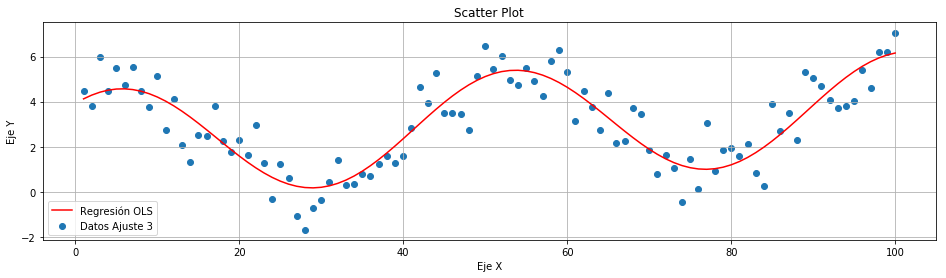

In [10]:
# Realizamos un grafico de dispersión ( Scatter-Plot )
plt.figure( figsize=(16,4) )                           # Indicamos el tamaño de la gráfica
plt.title("Scatter Plot")                              # Añadimos el titulo
plt.scatter( x, y,    label = "Datos Ajuste 3" )       # Añadimos la 'capa' de puntos 
plt.plot( x, y_OLS,   label = "Regresión OLS",   color="red")    # Añadimos la 'capa' de una linea
plt.xlabel("Eje X")                                    # Modificamos la etiqueta del eje X
plt.ylabel("Eje Y")                                    # Modificamos la etiqueta del eje Y
plt.grid()                                             # Añadimos una cuadricula/rendija 
plt.legend()                                           # Añadimos un cuadro con la leyenda
plt.show()                                             # Indicamos que queremos mostrar la gráfica

Ahora supongamos que tenemos desconocimiento sobre los coeficientes que determinan la frecuencia de las funciones Seno y Coseno

Podemos entonces, pensar en el siguiente modelo

$$y = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot sin\left( \beta_4 \cdot x \right) + \beta_3 \cdot cos\left( \beta_5 \cdot x \right) + \varepsilon$$

Veamos que este modelo ya no es un modelo lineal, por lo que los resultados obtenidos pueden no ser los óptimos.


Betas OLS nl [2.00353429 0.01854889 1.62972459 2.12904009 0.12743151 0.13150527]


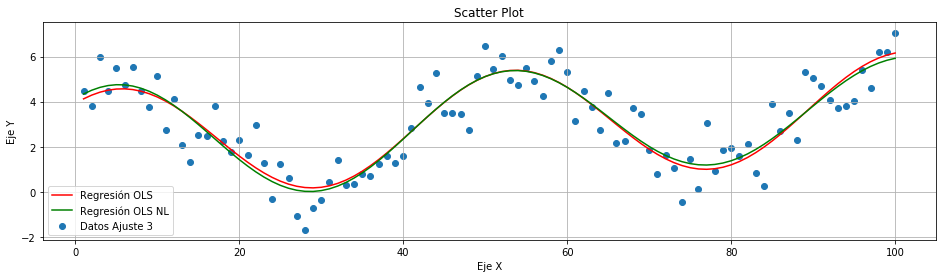

In [11]:
# Función de costo para una regresión lineal ordinaria por minimos cuadrados
def fun_costo_OLS_no_lineal( betas ):
    return np.mean( np.power( y - ( betas[0] + betas[1] * x + betas[2] * np.sin( betas[4] * x ) + betas[3] * np.cos( betas[5] * x) ) , 2 ) )

# Cuando se tiene que minizar una funciòn NO lineal, este método únicamente encuentra minimos (maximos) locales.
# Si desea utilizar funciones no lineales, ver las optimizadores no lineales como: 'basinhopping'
# Por lo que es muy importante tener que jugar con las betas iniciales
# Betas_iniciales           = np.array([ 0, 0, 0, 0,    0,    0 ])
# Betas_iniciales sugeridas = np.array([ 2, 0, 1, 2, 0.13, 0.13 ])

#betas_OLS_nl = minimize( fun_costo_OLS_no_lineal,   np.array([ 0, 0, 0, 0,    0,    0 ]) ).x
betas_OLS_nl = minimize( fun_costo_OLS_no_lineal,   np.array([ 2, 0, 1, 2, 0.13, 0.13 ]) ).x
print( "Betas OLS nl", betas_OLS_nl )
y_OLS_nl     =  betas_OLS_nl[0] + betas_OLS_nl[1] * x + betas_OLS_nl[2] * np.sin( betas_OLS_nl[4] * x) + betas_OLS_nl[3] * np.cos( betas_OLS_nl[5] * x ) 

# Realizamos un grafico de dispersión ( Scatter-Plot )
plt.figure( figsize=(16,4) )                           # Indicamos el tamaño de la gráfica
plt.title("Scatter Plot")                              # Añadimos el titulo
plt.scatter( x, y,     label = "Datos Ajuste 3" )       # Añadimos la 'capa' de puntos 
plt.plot( x, y_OLS,    label = "Regresión OLS",    color="red")    # Añadimos la 'capa' de una linea
plt.plot( x, y_OLS_nl, label = "Regresión OLS NL", color="green")  # Añadimos la 'capa' de una linea
plt.xlabel("Eje X")                                    # Modificamos la etiqueta del eje X
plt.ylabel("Eje Y")                                    # Modificamos la etiqueta del eje Y
plt.grid()                                             # Añadimos una cuadricula/rendija 
plt.legend()                                           # Añadimos un cuadro con la leyenda
plt.show()                                             # Indicamos que queremos mostrar la gráfica

Betas OLS nl basinhopping [ 2.18365772  0.01626738 -1.09963721  1.55949938  6.13398357 -0.1170742 ]


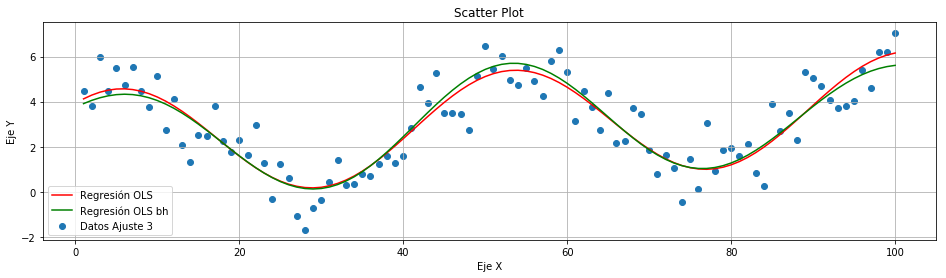

In [12]:
# Betas por basinhopping con paràmetros por defecto
#np.random.seed(123)
np.random.seed(3)

betas_OLS_bh = basinhopping( fun_costo_OLS_no_lineal,   np.array([ 0, 0, 0, 0, 0, 0 ]) ).x
print( "Betas OLS nl basinhopping", betas_OLS_bh )
y_OLS_bh     =  betas_OLS_bh[0] + betas_OLS_bh[1] * x + betas_OLS_bh[2] * np.sin( betas_OLS_bh[4] * x) + betas_OLS_bh[3] * np.cos( betas_OLS_bh[5] * x ) 

# Vease que el resultado de las estimaciones varia con cada ejecución (es aleatorio) debido a 
# que el algoritmo realiza ciertas simulaciones aleatorias dentro del mismo
# Podemos modificar los parámetros aunque no se recomienda ser tan "exigentes"
# en la tolerancia, iteraciones, etc... ya que implica un costo computacional relativamente alto

# Realizamos un grafico de dispersión ( Scatter-Plot )
plt.figure( figsize=(16,4) )                           # Indicamos el tamaño de la gráfica
plt.title("Scatter Plot")                              # Añadimos el titulo
plt.scatter( x, y,     label = "Datos Ajuste 3" )       # Añadimos la 'capa' de puntos 
plt.plot( x, y_OLS,    label = "Regresión OLS",   color="red")    # Añadimos la 'capa' de una linea
plt.plot( x, y_OLS_bh, label = "Regresión OLS bh", color="green")  # Añadimos la 'capa' de una linea
plt.xlabel("Eje X")                                    # Modificamos la etiqueta del eje X
plt.ylabel("Eje Y")                                    # Modificamos la etiqueta del eje Y
plt.grid()                                             # Añadimos una cuadricula/rendija 
plt.legend()                                           # Añadimos un cuadro con la leyenda
plt.show()                                             # Indicamos que queremos mostrar la gráfica